In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

 95% 209M/219M [00:01<00:00, 150MB/s]
100% 219M/219M [00:01<00:00, 129MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/rice-image-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
class_name = os.listdir('/content/Rice_Image_Dataset')
class_name

['Rice_Citation_Request.txt',
 'Karacadag',
 'Arborio',
 'Jasmine',
 'Basmati',
 'Ipsala']

In [6]:
path = '/content/Rice_Image_Dataset'

In [7]:
file_path = list(glob.glob(path+'/**/*.*'))

In [8]:
print(file_path[0:2])

['/content/Rice_Image_Dataset/Karacadag/Karacadag (11467).jpg', '/content/Rice_Image_Dataset/Karacadag/Karacadag (7424).jpg']


In [9]:
lables = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))
lables

['Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Karacadag',
 'Kara

In [10]:
filepath = pd.Series(file_path,name='filepaths').astype('str')
lables = pd.Series(lables,name='Lables')
data = pd.concat([filepath,lables],axis=1,ignore_index=True)
data.sample

<bound method NDFrame.sample of                                                        0          1
0      /content/Rice_Image_Dataset/Karacadag/Karacada...  Karacadag
1      /content/Rice_Image_Dataset/Karacadag/Karacada...  Karacadag
2      /content/Rice_Image_Dataset/Karacadag/Karacada...  Karacadag
3      /content/Rice_Image_Dataset/Karacadag/Karacada...  Karacadag
4      /content/Rice_Image_Dataset/Karacadag/Karacada...  Karacadag
...                                                  ...        ...
74995  /content/Rice_Image_Dataset/Ipsala/Ipsala (915...     Ipsala
74996  /content/Rice_Image_Dataset/Ipsala/Ipsala (207...     Ipsala
74997  /content/Rice_Image_Dataset/Ipsala/Ipsala (110...     Ipsala
74998  /content/Rice_Image_Dataset/Ipsala/Ipsala (663...     Ipsala
74999  /content/Rice_Image_Dataset/Ipsala/Ipsala (463...     Ipsala

[75000 rows x 2 columns]>

In [11]:
data

,0,1
0,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag
1,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag
2,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag
3,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag
4,/content/Rice_Image_Dataset/Karacadag/Karacada...,Karacadag
...,...,...
74995,/content/Rice_Image_Dataset/Ipsala/Ipsala (915...,Ipsala
74996,/content/Rice_Image_Dataset/Ipsala/Ipsala (207...,Ipsala
74997,/content/Rice_Image_Dataset/Ipsala/Ipsala (110...,Ipsala
74998,/content/Rice_Image_Dataset/Ipsala/Ipsala (663...,Ipsala


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

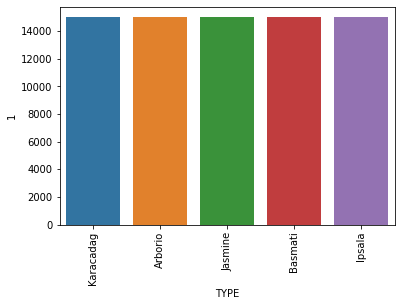

In [12]:
counts = data[1].value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('TYPE')
plt.xticks(rotation=90)

In [13]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.2,random_state=42)

In [14]:
print(train.shape)
print(test.shape)

(60000, 2)
(15000, 2)


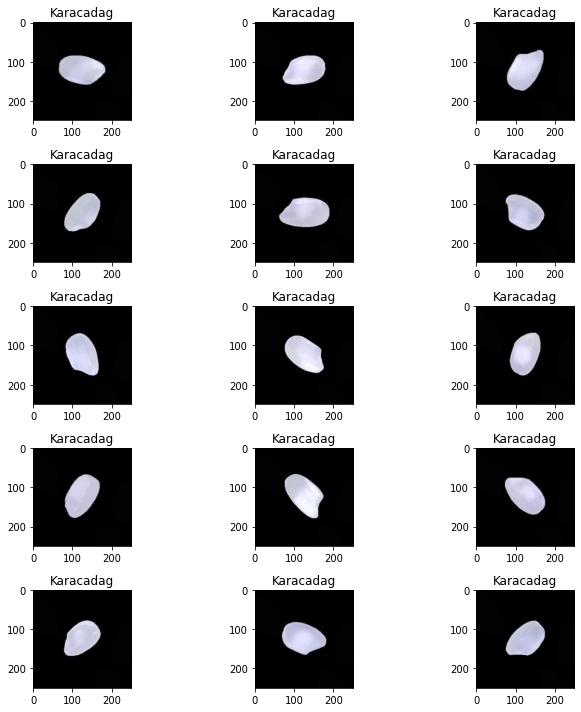

In [15]:
fig,axes = plt.subplots(figsize=(10,10),nrows=5,ncols=3)
for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(data[0][i]))
  ax.set_title(data[1][i])
plt.tight_layout()
plt.show()


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [17]:
batch_size = 128
img_height, img_width = 224, 224
input_shape = (img_height, img_width, 3)

In [33]:
train.rename(columns = {0:'filepath',1:'lables'},inplace=True)
test.rename(columns = {0:'filepath',1:'lables'},inplace=True)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_ds = datagen.flow_from_dataframe(
    dataframe=train,
    x_col = 'filepath',
    y_col='lables',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical')

val_ds = datagen.flow_from_dataframe(
    dataframe=test,
    x_col = 'filepath',
    y_col='lables',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=True)

test_ds = datagen.flow_from_dataframe(
    dataframe=test,
    x_col = 'filepath',
    y_col='lables',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=True)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


In [36]:
# TRANSFER LEARNING

In [37]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
vgg16.trainable = False
inputs = tf.keras.Input(input_shape)
x = vgg16(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)
model_vgg16 = tf.keras.Model(inputs, x)

58889256/58889256 [==============================] - 0s 0us/step


In [38]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 15,245,125
Trainable params: 530,437
Non-trainable params: 14,714,688
___________________________________________

In [39]:
checkpointer = ModelCheckpoint(filepath='saved_models/model_vgg16.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [40]:
history = model_vgg16.fit(train_ds, epochs = 12, validation_data = val_ds, callbacks=callbacks)

Epoch 1/12
469/469 [==============================] - ETA: 0s - loss: 0.2155 - accuracy: 0.9456
Epoch 1: val_accuracy improved from -inf to 0.98373, saving model to saved_models/model_vgg16.hdf5
469/469 [==============================] - 379s 770ms/step - loss: 0.2155 - accuracy: 0.9456 - val_loss: 0.0600 - val_accuracy: 0.9837 - lr: 0.0010
Epoch 2/12
469/469 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9847
Epoch 2: val_accuracy improved from 0.98373 to 0.98793, saving model to saved_models/model_vgg16.hdf5
469/469 [==============================] - 355s 758ms/step - loss: 0.0520 - accuracy: 0.9847 - val_loss: 0.0419 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 3/12
469/469 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9880
Epoch 3: val_accuracy improved from 0.98793 to 0.99107, saving model to saved_models/model_vgg16.hdf5
469/469 [==============================] - 355s 757ms/step - loss: 0.0387 - accuracy: 0.9880 - val_loss: 0.0276 -

In [41]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

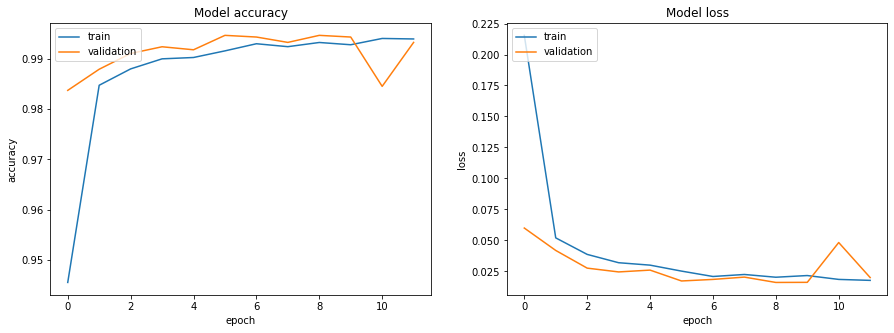

In [42]:
plot_train_history(history)

In [43]:
score = model_vgg16.evaluate(test_ds, verbose=1)
print(f'Model VGG16 Loss: {score[0]}, Accuracy: {score[1]*100}')

118/118 [==============================] - 72s 604ms/step - loss: 0.0200 - accuracy: 0.9933
Model VGG16 Loss: 0.019979264587163925, Accuracy: 99.32666420936584
